<a href="https://colab.research.google.com/github/anchalchepurwar/ML_pr/blob/main/Ml_pr4_bonus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Train Linear Regression model (baseline)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_metrics = calculate_metrics(y_test, lr_pred)

In [6]:
k_values = [3, 5, 7, 9, 11, 13, 15]
knn_metrics = []

for k in k_values:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    knn_pred = knn_model.predict(X_test_scaled)
    metrics = calculate_metrics(y_test, knn_pred)
    knn_metrics.append(metrics)

In [7]:
metrics_df = pd.DataFrame(columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2'])

# Add Linear Regression results
metrics_df.loc[0] = ['Linear Regression'] + list(lr_metrics)

# Add KNN results
for k, metrics in zip(k_values, knn_metrics):
    metrics_df.loc[len(metrics_df)] = [f'KNN (k={k})'] + list(metrics)

# Convert metrics to dollar values (multiply by 100000)
metrics_df['MAE'] = metrics_df['MAE'] * 100000
metrics_df['MSE'] = metrics_df['MSE'] * 100000
metrics_df['RMSE'] = metrics_df['RMSE'] * 100000

print("\nModel Comparison:")
print(metrics_df.to_string(index=False, float_format=lambda x: f'{x:,.2f}'))


Model Comparison:
            Model       MAE       MSE      RMSE   R2
Linear Regression 53,320.01 55,589.16 74,558.14 0.58
        KNN (k=3) 45,991.99 46,666.34 68,312.77 0.64
        KNN (k=5) 44,615.35 43,242.16 65,758.77 0.67
        KNN (k=7) 44,403.87 42,833.35 65,447.19 0.67
        KNN (k=9) 44,092.72 42,462.32 65,163.12 0.68
       KNN (k=11) 43,843.18 41,859.32 64,698.78 0.68
       KNN (k=13) 43,730.25 41,628.90 64,520.46 0.68
       KNN (k=15) 43,891.54 41,875.28 64,711.11 0.68


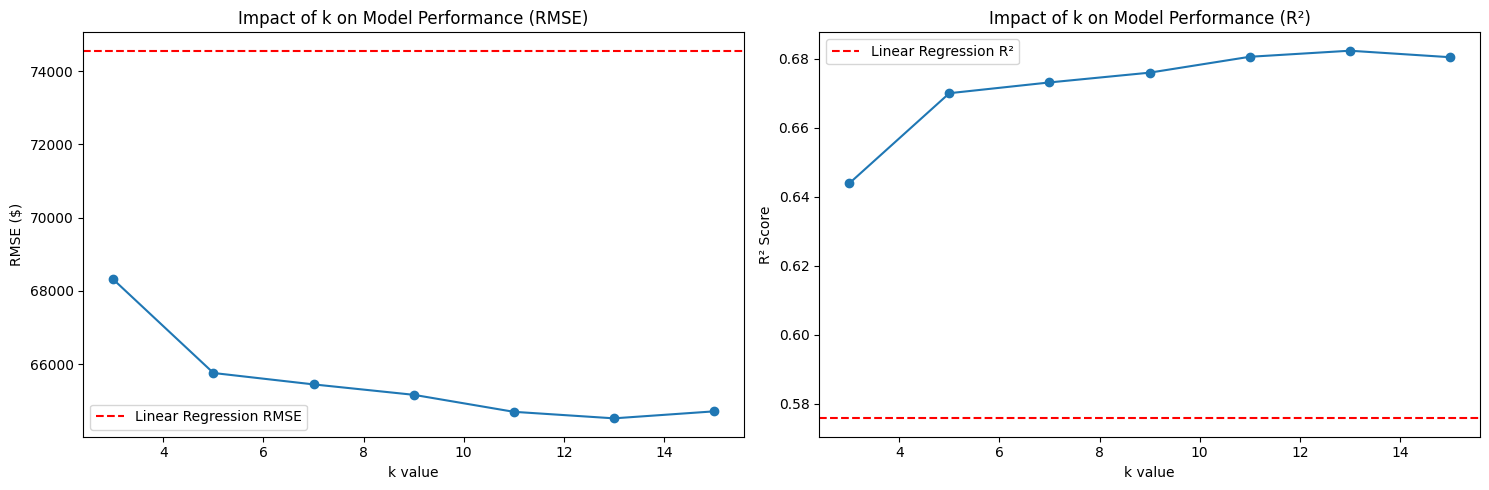


Best performing KNN model: k=13
Best KNN RMSE: $64,520.46
Linear Regression RMSE: $74,558.14


In [9]:
plt.figure(figsize=(15, 5))

# Plot 1: k vs RMSE
plt.subplot(1, 2, 1)
knn_rmse = [metrics[2] * 100000 for metrics in knn_metrics]
plt.plot(k_values, knn_rmse, marker='o')
plt.axhline(y=lr_metrics[2] * 100000, color='r', linestyle='--', label='Linear Regression RMSE')
plt.xlabel('k value')
plt.ylabel('RMSE ($)')
plt.title('Impact of k on Model Performance (RMSE)')
plt.legend()

# Plot 2: k vs R2
plt.subplot(1, 2, 2)
knn_r2 = [metrics[3] for metrics in knn_metrics]
plt.plot(k_values, knn_r2, marker='o')
plt.axhline(y=lr_metrics[3], color='r', linestyle='--', label='Linear Regression R²')
plt.xlabel('k value')
plt.ylabel('R² Score')
plt.title('Impact of k on Model Performance (R²)')
plt.legend()

plt.tight_layout()
plt.show()

# Find best performing KNN model
best_k_idx = np.argmin([metrics[2] for metrics in knn_metrics])  # Based on RMSE
best_k = k_values[best_k_idx]

print(f"\nBest performing KNN model: k={best_k}")
print(f"Best KNN RMSE: ${knn_metrics[best_k_idx][2] * 100000:,.2f}")
print(f"Linear Regression RMSE: ${lr_metrics[2] * 100000:,.2f}")

